In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [9]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [12]:
df.mode().iloc[0]

Transaction ID                        1
Date                2023-05-16 00:00:00
Customer ID                     CUST001
Gender                           Female
Age                                43.0
Product Category               Clothing
Quantity                            4.0
Price per Unit                     50.0
Total Amount                       50.0
Name: 0, dtype: object

Most frequent values across each columns

In [13]:
df["Gender"].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

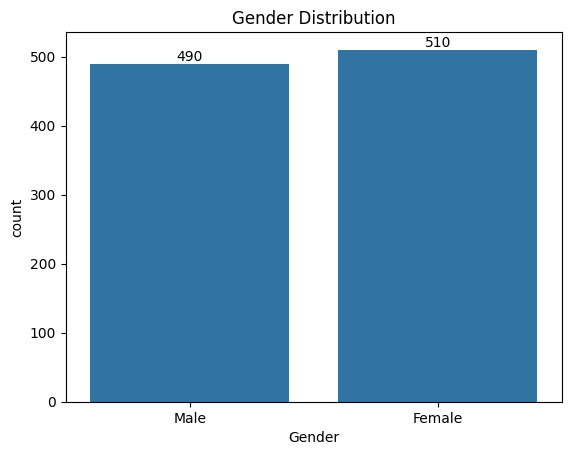

In [36]:
ax = sns.countplot(x = "Gender", data = df)
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

In [17]:
df["Product Category"].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

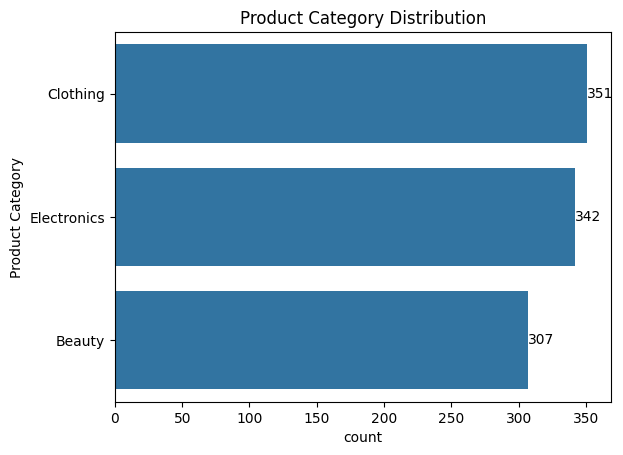

In [35]:
ax = sns.countplot(y = "Product Category", data = df, order = df["Product Category"].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Product Category Distribution")
plt.show()

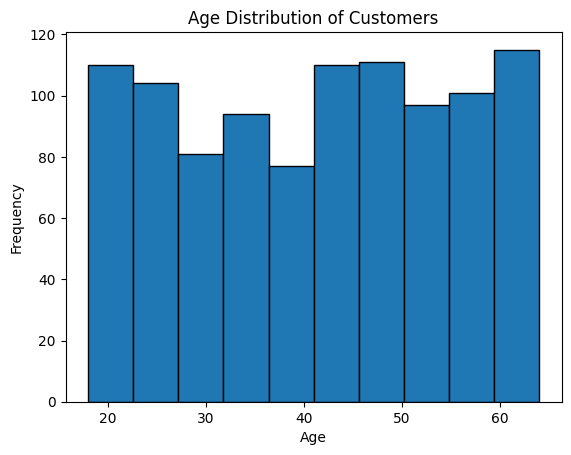

In [19]:
plt.hist(df["Age"], bins = 10, edgecolor = "black")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [20]:
sales_trend = df.groupby("Date")["Total Amount"].sum().reset_index()

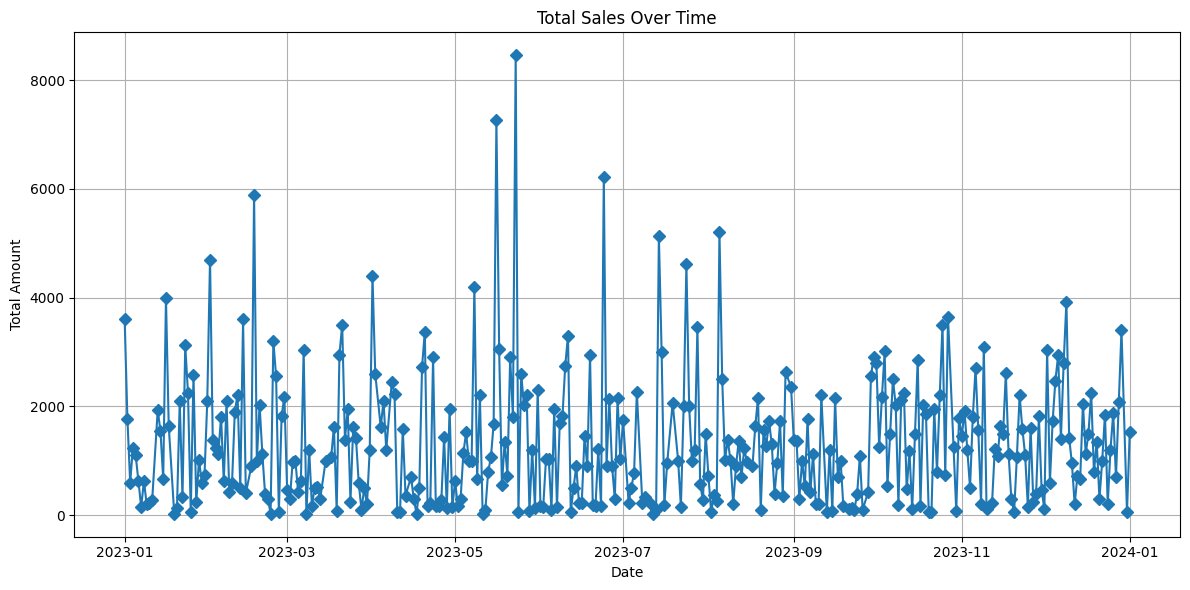

In [24]:
plt.figure(figsize = (12,6))
plt.plot(sales_trend["Date"], sales_trend["Total Amount"], marker = "D")
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
df["Month"] = df["Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Total Amount"].sum().reset_index()
monthly_sales["Month"] = monthly_sales["Month"].astype(str)


Converting Period to string for plotting

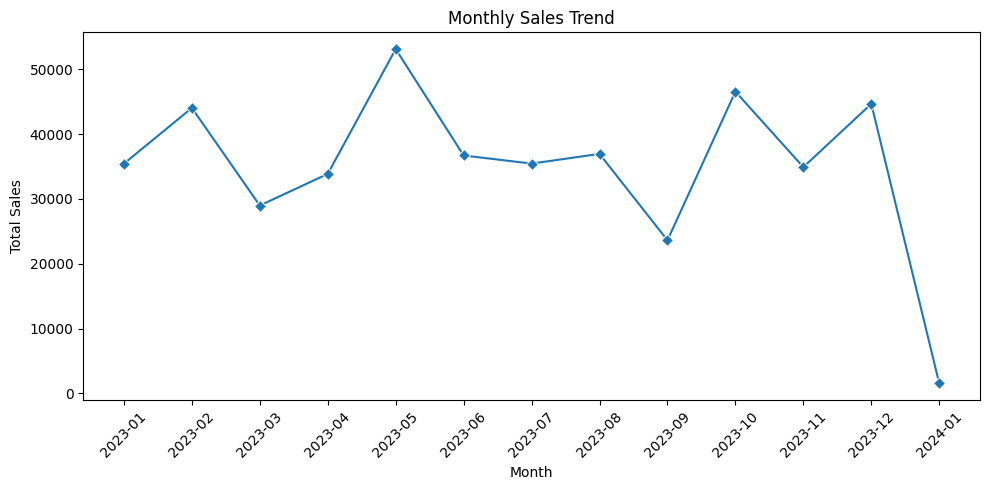

In [28]:
plt.figure(figsize = (10,5))
sns.lineplot(x = "Month", y = "Total Amount", data = monthly_sales, marker = "D")
plt.xticks(rotation = 45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

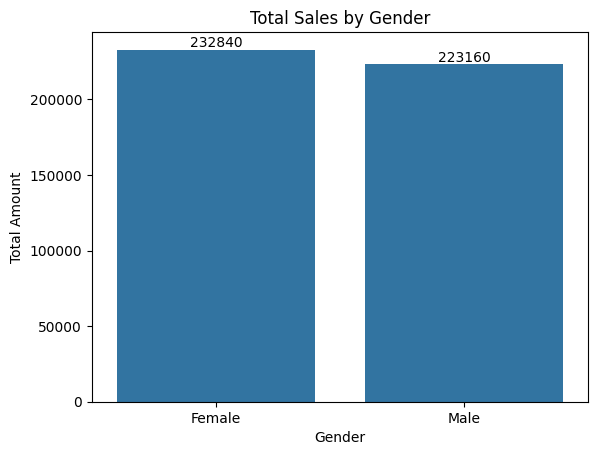

In [38]:
gender_sales = df.groupby("Gender")["Total Amount"].sum().reset_index()

ax = sns.barplot(x = "Gender", y = "Total Amount", data = gender_sales)
ax.bar_label(ax.containers[0])
plt.title("Total Sales by Gender")
plt.show()

C:\Users\Gourab\AppData\Local\Temp\ipykernel_9340\3021004632.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby("Age Group")["Total Amount"].sum().reset_index()


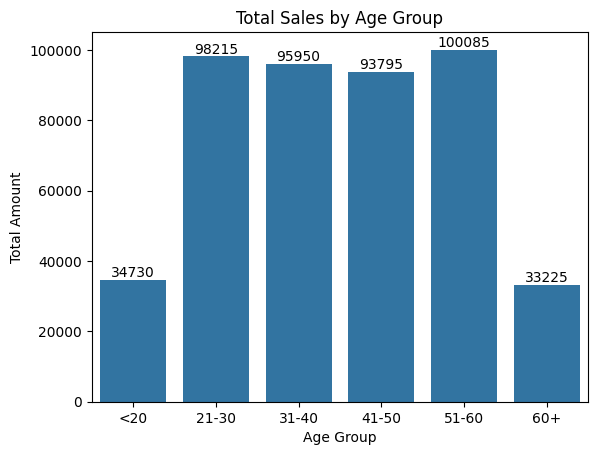

In [40]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ["<20", "21-30", "31-40", "41-50", "51-60", "60+"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels)

age_group_sales = df.groupby("Age Group")["Total Amount"].sum().reset_index()

ax = sns.barplot(x = "Age Group", y = "Total Amount", data = age_group_sales)
ax.bar_label(ax.containers[0])
plt.title("Total Sales by Age Group")
plt.show()

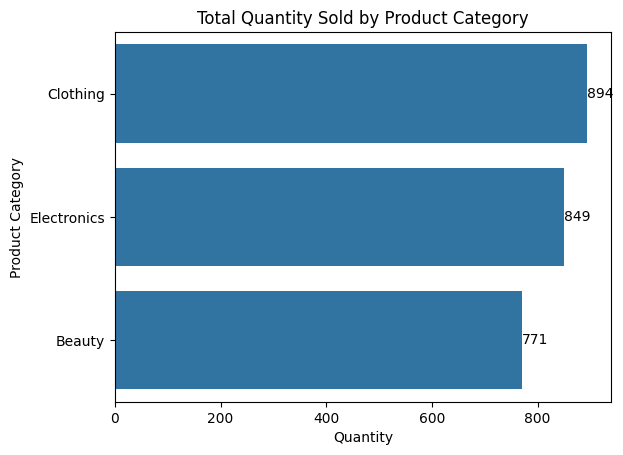

In [41]:
product_quantity = df.groupby("Product Category")["Quantity"].sum().reset_index().sort_values(by = "Quantity", ascending = False)
ax = sns.barplot(x = "Quantity", y = "Product Category", data = product_quantity)
ax.bar_label(ax.containers[0])
plt.title("Total Quantity Sold by Product Category")
plt.show()

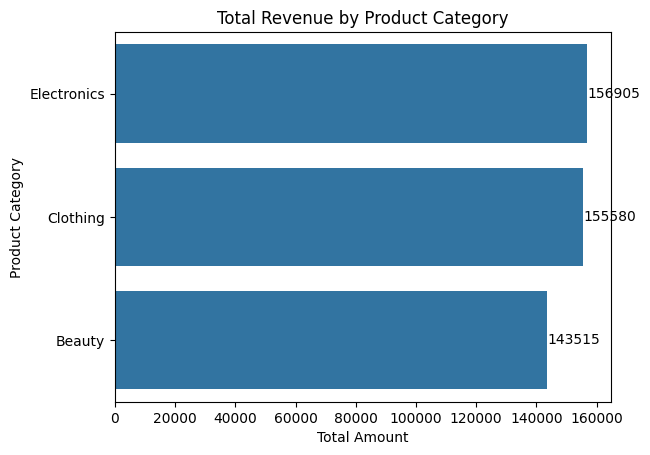

In [42]:
product_revenue = df.groupby("Product Category")["Total Amount"].sum().reset_index().sort_values(by = "Total Amount", ascending = False)
ax = sns.barplot(x = "Total Amount", y = "Product Category", data = product_revenue)
ax.bar_label(ax.containers[0])
plt.title("Total Revenue by Product Category")
plt.show()

Actionable Recommendations Based on EDA - 

1. Sales and Time Trends
- Focus promotional campaigns during high-sales months, as identified in the time series analysis (e.g. May, October).

- Introduce seasonal discounts or flash sales during low-performing months to balance revenue flow throughout the year.

2. Customer Behavior
- Female customers contribute more to total sales. Consider designing gender-targeted promotions or loyalty programs.

- The 51-60 age group shows the highest spending—consider focused marketing on this segment via digital channels.

 3. Product Performance
Top-selling product categories like (e.g. Electronics, Clothing) should be prioritized in:

- Stock management

- Featured product placements

- Upselling strategies

Low-selling categories can be promoted via:

- Bundling with popular items

- Seasonal promotions

- Clearance sales

4. Operational Strategy
- Use the monthly sales trend to plan inventory and staffing levels.

- Maintain high inventory levels of high-revenue products during peak sales months to avoid stockouts.

5. Data-Driven Growth
- Consider segmenting customers further by purchase frequency and total spend to personalize offers.

- Use this EDA as a baseline and continue tracking trends regularly (monthly/quarterly) for real-time decision-making.